<div align="center">
  <h2>EXPLORATRY DATA ANALYSIS</h2>
</div>


### *Importing Libraries*

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [69]:
data = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/heart_disease_uci.csv")

### *Summary statistics*

In [70]:
print("Summary statistics\n",data.describe().T)

Summary statistics
           count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  230.75  460.5  690.25  920.0
age       920.0   53.510870    9.424685  28.0   47.00   54.0   60.00   77.0
trestbps  861.0  132.132404   19.066070   0.0  120.00  130.0  140.00  200.0
chol      890.0  199.130337  110.780810   0.0  175.00  223.0  268.00  603.0
thalch    865.0  137.545665   25.926276  60.0  120.00  140.0  157.00  202.0
oldpeak   858.0    0.878788    1.091226  -2.6    0.00    0.5    1.50    6.2
ca        309.0    0.676375    0.935653   0.0    0.00    0.0    1.00    3.0
num       920.0    0.995652    1.142693   0.0    0.00    1.0    2.00    4.0


### *Create histograms and boxplots for numeric features*

In [71]:
data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

#### *Histogram*

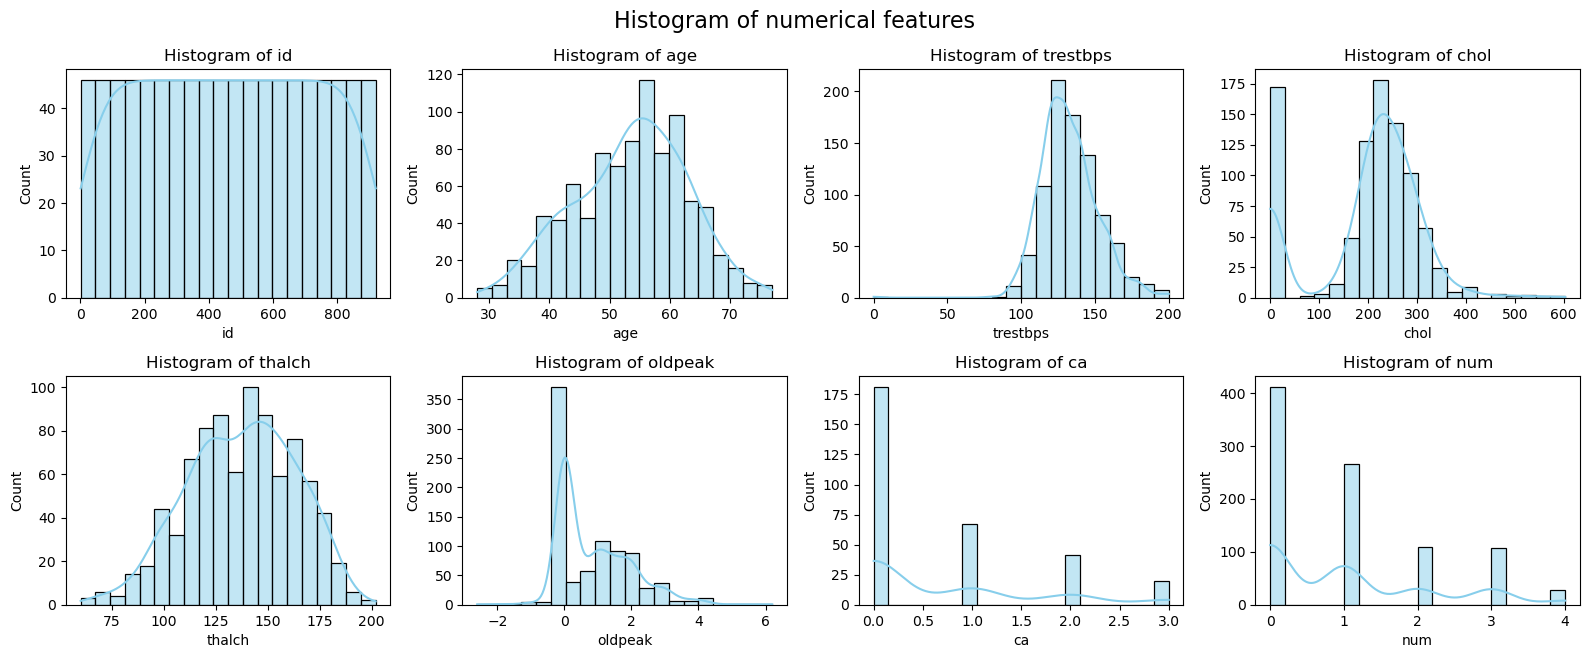

In [72]:
numeric_cols = data.select_dtypes(include = ['int64','float64']).columns

plt.figure(figsize = (16,12))
for i , col in enumerate(numeric_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(data[col].dropna(), kde= True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.suptitle('Histogram of numerical features', fontsize = 16, y=1.02)
plt.show()



#### *Boxplot*

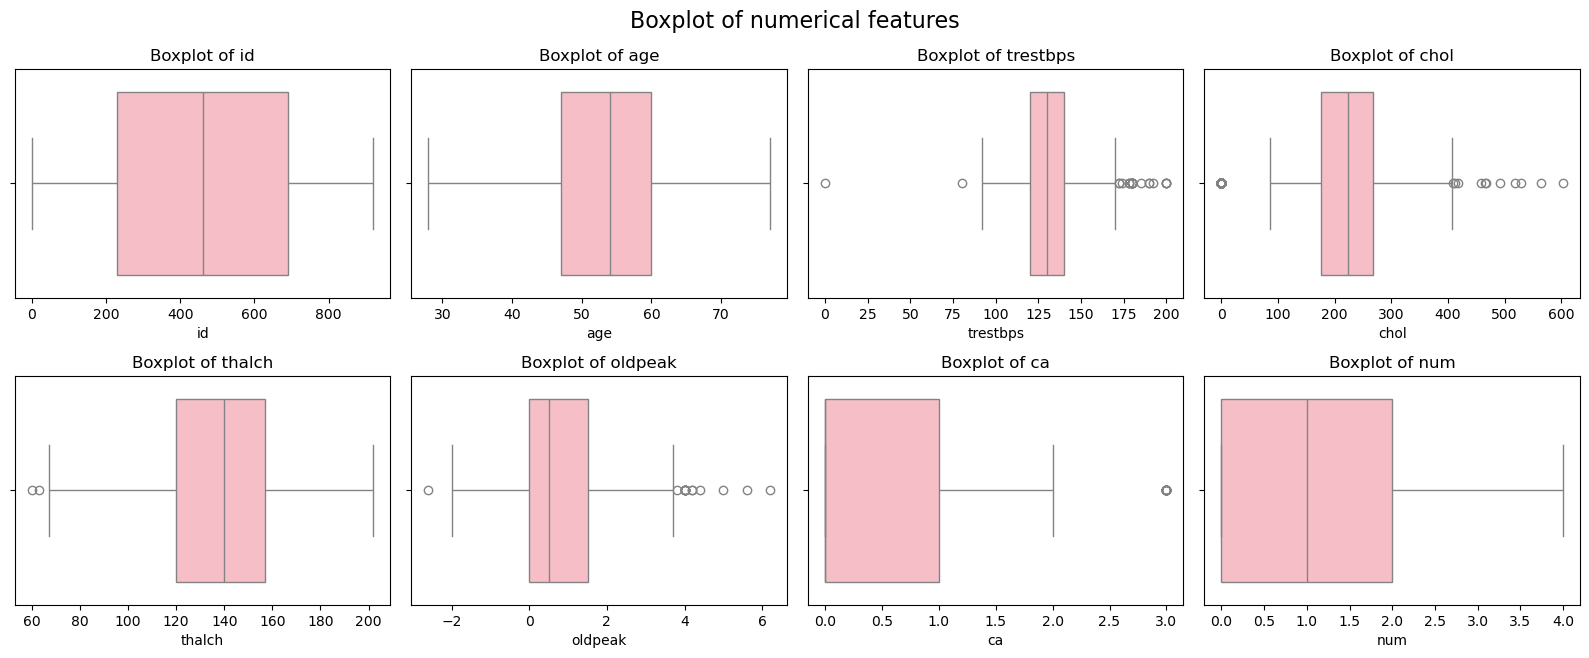

In [73]:
plt.figure(figsize = (16,12))
for i , col in enumerate(numeric_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=data[col], color='lightpink')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.suptitle('Boxplot of numerical features', fontsize = 16, y=1.02)
plt.show()



#### *Count Plot (Categorical Feature Frequencies)*

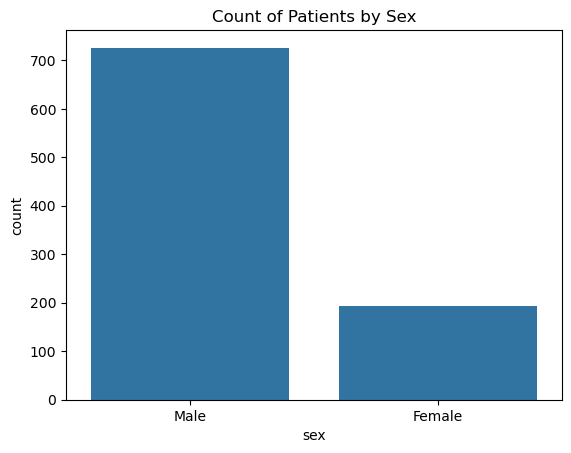

In [74]:
sns.countplot(x='sex', data=data)
plt.title("Count of Patients by Sex")
plt.show()

#### *Bar Plot (Mean cholesterol by sex)*

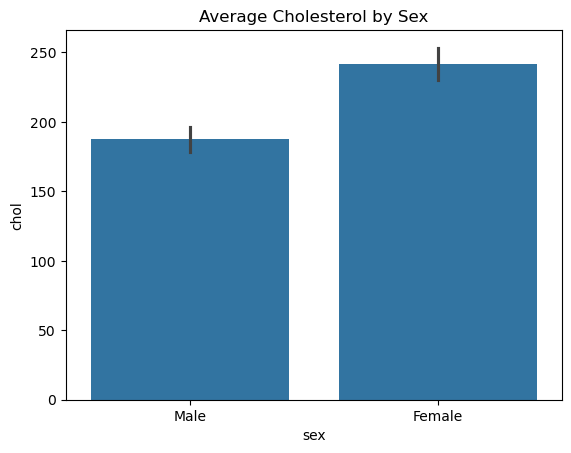

In [75]:
sns.barplot(x='sex', y='chol', data=data)
plt.title("Average Cholesterol by Sex")
plt.show()

#### *Interactive Plotly Chart (Age vs. Cholesterol)*

In [76]:
import plotly.express as px

fig = px.scatter(data, x='age', y='chol', color='num',
                 title='Age vs. Cholesterol by Heart Disease Status',
                 labels={'num': 'Heart Disease'})
fig.show()

### *Pairplot for feature relationship*

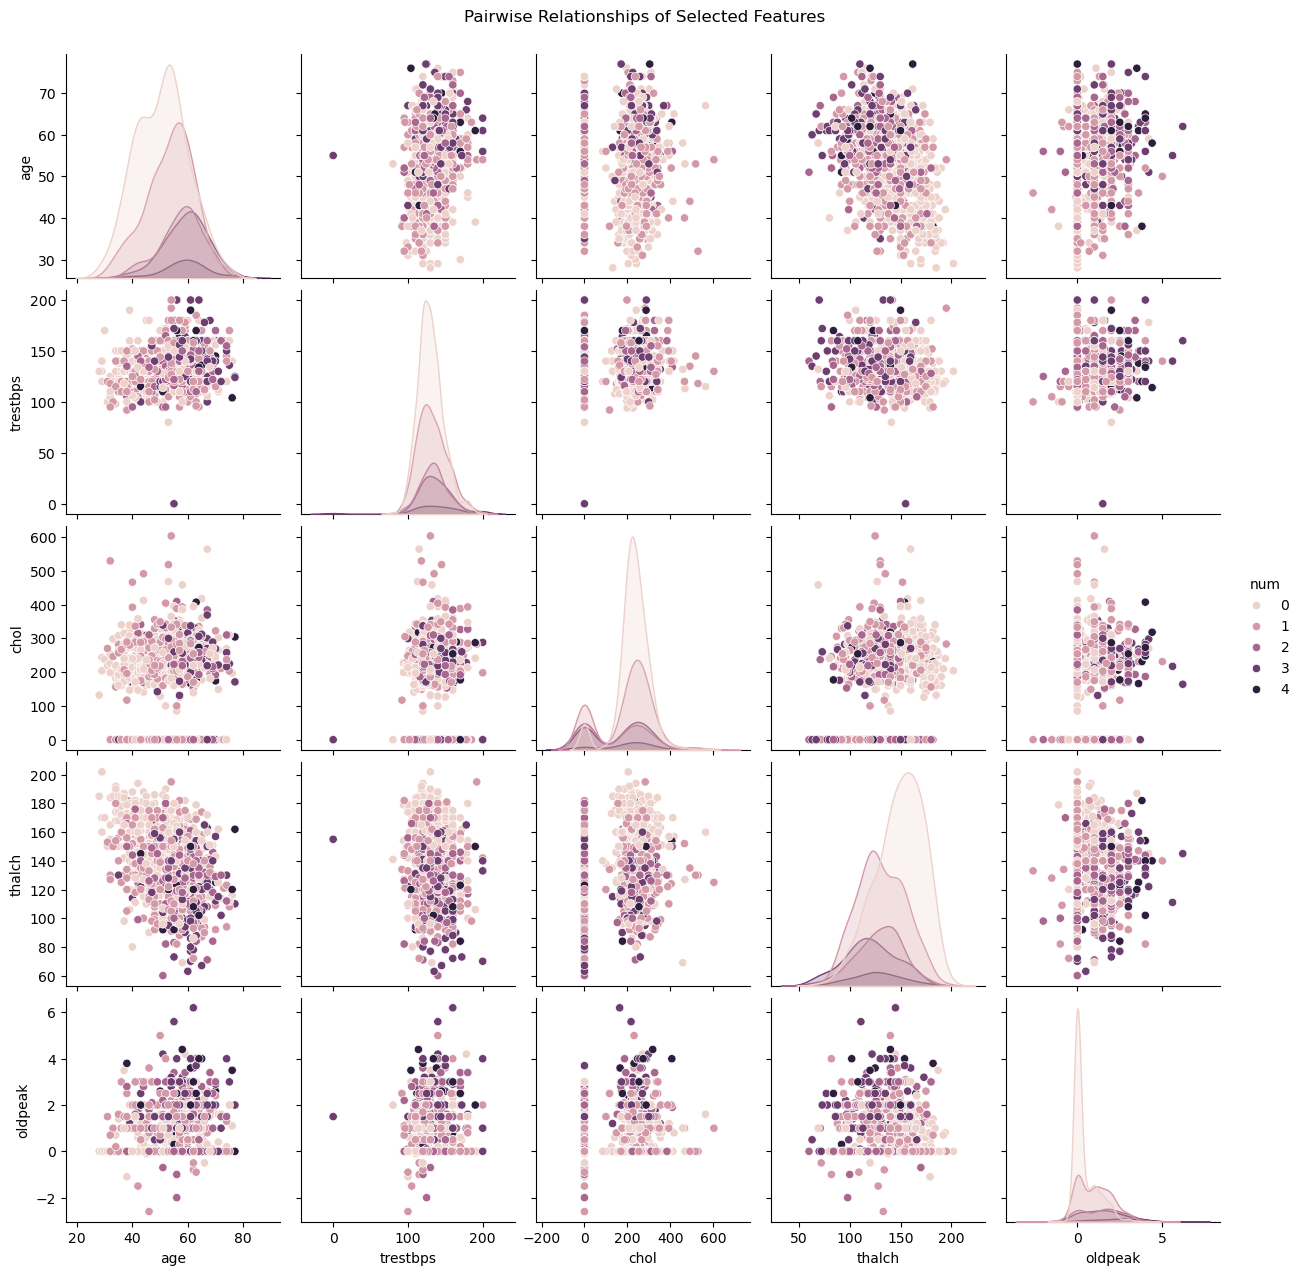

In [77]:
import seaborn as sns

selected_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

sns.pairplot(data[selected_cols], hue='num', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Selected Features", y=1.02)
plt.show()

### *Identify patterns, trends or anomalies in the data*

#### *Class Imbalance Analysis*

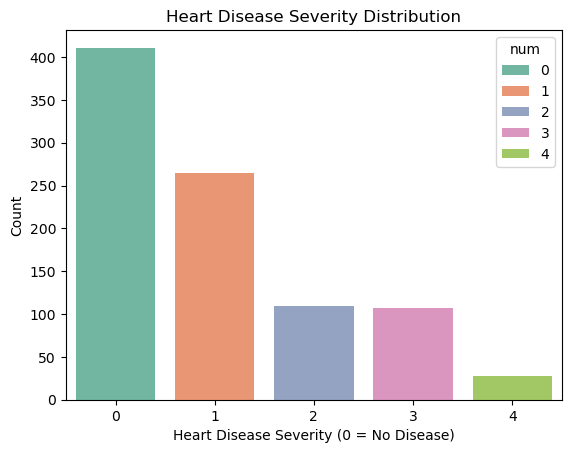

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: Proportion, dtype: float64


In [78]:
sns.countplot(x='num',hue='num', data=data, palette='Set2')
plt.title("Heart Disease Severity Distribution")
plt.xlabel("Heart Disease Severity (0 = No Disease)")
plt.ylabel("Count")
plt.show()

# Print class distribution
print(data['num'].value_counts(normalize=True).rename("Proportion"))


#### *Trends by Age Groups*

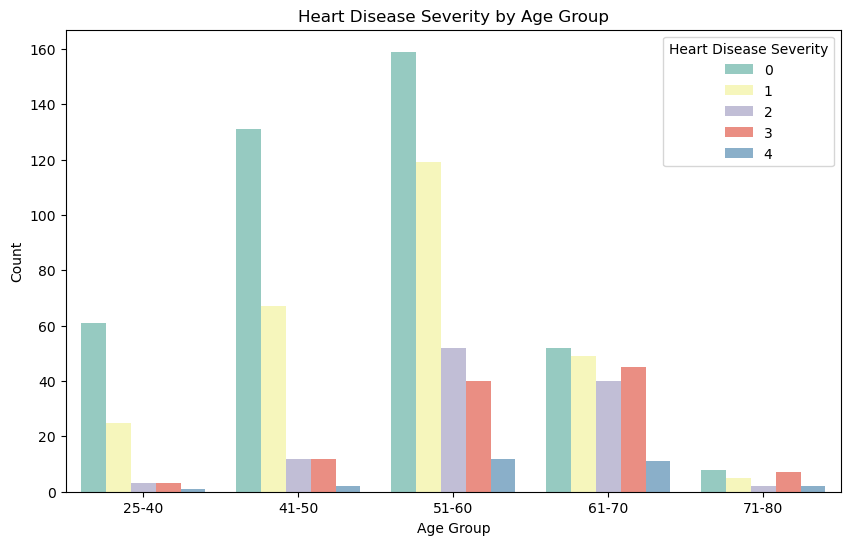

In [79]:
data['age_group'] = pd.cut(data['age'], bins=[25, 40, 50, 60, 70, 80], 
                           labels=["25-40", "41-50", "51-60", "61-70", "71-80"])

# Count of heart disease by age group
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='num', data=data, palette='Set3')
plt.title("Heart Disease Severity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Heart Disease Severity')
plt.show()


#### *Outlier Detection (Z-score method)*

In [80]:
from scipy.stats import zscore

numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df_numeric = data[numeric_features].dropna()

z_scores = np.abs(zscore(df_numeric))
outlier_mask = (z_scores > 3).any(axis=1)


outlier_indices = df_numeric[outlier_mask].index

print("Number of outlier rows (z > 3):", len(outlier_indices))
display(data.loc[outlier_indices].head())


Number of outlier rows (z > 3): 18


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
91,92,62,Female,Cleveland,asymptomatic,160.0,164.0,False,lv hypertrophy,145.0,False,6.2,downsloping,3.0,reversable defect,3,61-70
123,124,55,Male,Cleveland,asymptomatic,140.0,217.0,False,normal,111.0,True,5.6,downsloping,0.0,reversable defect,3,51-60
126,127,56,Female,Cleveland,asymptomatic,200.0,288.0,True,lv hypertrophy,133.0,True,4.0,downsloping,2.0,reversable defect,3,51-60
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0,61-70
183,184,59,Male,Cleveland,typical angina,178.0,270.0,False,lv hypertrophy,145.0,False,4.2,downsloping,0.0,reversable defect,0,51-60


####  *Relationship Between Chest Pain and Disease*

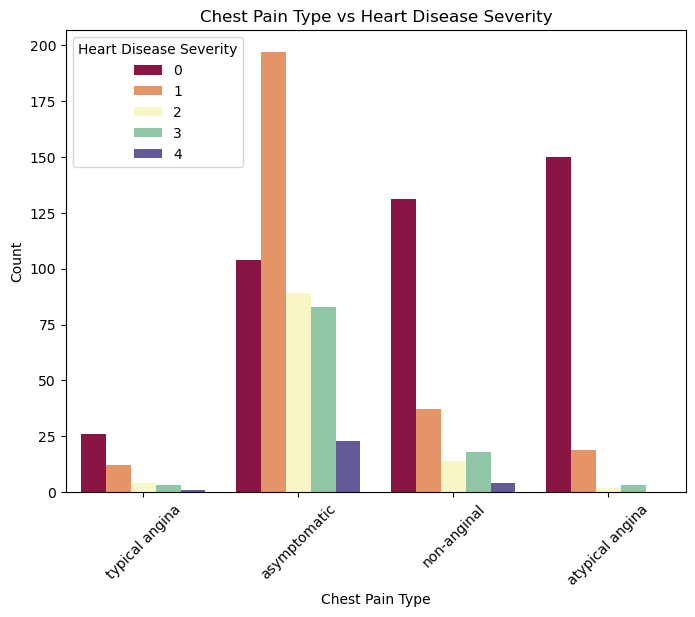

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(x='cp', hue='num', data=data, palette='Spectral')
plt.title("Chest Pain Type vs Heart Disease Severity")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Heart Disease Severity')
plt.show()


####  *Interactive Outlier Plot with Plotly*

In [82]:
fig = px.scatter(data, x='age', y='chol', color='num',
                 hover_data=['trestbps', 'oldpeak'],
                 title='Cholesterol vs Age with Heart Disease Status',
                 labels={'num': 'Heart Disease'})
fig.show()

#### *Feature-Target Correlation (via Grouped Means)*

In [83]:
group_means = data.groupby('num')[numeric_features].mean()
print("Average Feature Values by Heart Disease Severity:")
display(group_means)


Average Feature Values by Heart Disease Severity:


,age,trestbps,chol,thalch,oldpeak
num,,,,,
0,50.547445,129.913043,227.905612,148.800512,0.418205
1,53.528302,132.861111,195.255814,131.035714,1.001200
2,57.577982,133.613861,143.859813,128.666667,1.353465
3,59.214953,136.152174,159.716981,120.500000,1.581319
4,59.214286,138.720000,192.148148,127.846154,2.307692


### *Feature level inferences from visual*

__1) Age :__
- Older patients tend to have a higher incidence of heart disease.
- Distribution is relatively uniform between ages 40–70.

__2) Sex :__
- Males are more represented in the dataset.
- Average cholesterol slightly higher in males.

__3) Chain pain type(cp) :__
- Type 0 (typical angina) is more common in patients without heart disease.
- Types 2 and 3 are more common among heart disease patients.

__4) Cholesterol (chol):__
- Right-skewed distribution with several outliers.
- High cholesterol is common across both healthy and affected patients.

__5) Resting Blood Pressure (trestbps):__
- Right-skewed distribution with several outliers.
- High cholesterol is common across both healthy and affected patients.

__6) Maximum Heart Rate Achieved (thalch):__
- Higher rates generally correspond to no heart disease.
- Patients with heart disease have lower max heart rates on average.

__7) ST Depression (oldpeak):__
- Strong positive correlation with heart disease.
- Higher oldpeak values are more common among affected patients.

__8). Exercise-Induced Angina (exang):__
- Patients with exercise-induced angina are more likely to have heart disease.

__9). Thalassemia (thal):__
- Thal type 2 and 3 are more frequently seen in patients with heart disease.


<div align="center">
  <h4>THANK YOU</h4>
</div>